In [26]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# set formatting options
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})


In [27]:
# imports and utils


def plot_line(vec, intercept, x_lo=0, x_hi=10):
    m = vec[1]/vec[0]
    x = np.linspace(x_lo, x_hi)
    y = m * x + intercept
    plt.plot(x, y, 'k-')
    
def sorted_eig(mat, desc=False):
    eigenvals, eigenvecs = LA.eig(mat)
    idx = np.argsort(eigenvals)
    if(desc):
        idx = idx[::-1]
    return eigenvals[idx], eigenvecs[:,idx]

def two_class_LDA(data, labels, label_space=[-1,1], verbose=True, plot=False, S_inv=None):
    
    
    data_1 = data[labels==label_space[0]]
    data_2 = data[labels==label_space[1]]
    if verbose:
        print(f'data1=\n{data_1}\ndata2=\n{data_2}')
    mu_1 = np.mean(data_1, axis=0)
    mu_2 = np.mean(data_2, axis=0)
    mu_1 = np.expand_dims(mu_1, axis=1) # convert array to column vector
    mu_2 = np.expand_dims(mu_2, axis=1)
    diff = mu_1 - mu_2
    B = (diff).dot(diff.T)
    Z_1, Z_2, S_1, S_2, S = None, None, None, None, None
    
    if verbose:
        print(f'mu_1 = \n{mu_1}\nmu_2=\n{mu_2}\nB=\n{B}\nmu_1 - mu_2=\n{diff}')
        
    
    if S_inv is None:
        Z_1 = data_1 - mu_1.T
        Z_2 = data_2 - mu_2.T

        S_1 = Z_1.T.dot(Z_1)
        S_2 = Z_2.T.dot(Z_2)
        
        S = S_1 + S_2
        if verbose:
            print(f'Z_1=\n{Z_1}\nZ_2=\n{Z_2}\nS_1=\n{S_1}\nS_2=\n{S_2}\nS=\n{S}')
        S_inv = LA.pinv(S)
        
            
    eigenvals, eigenvecs = sorted_eig(B.dot(S_inv))
        
    w = eigenvecs[:,-1]
    
    if verbose:
        print(f'eigenvals=\n{eigenvals}\neigenvecs=\n{eigenvecs}\nw=\n{w}')
    if plot:
        plt.scatter(data_1[:,0],data_1[:,1],marker='x')
        plt.scatter(data_2[:,0],data_2[:,1],marker='o')
        
    intermediates = {'mu_1':mu_1, 'mu_2':mu_2, 'B':B, 'Z_1':Z_1,
                     'Z_2':Z_2, 'S':S, 'S_1':S_1, 'S_2':S_2, 
                     'eigenvals':eigenvals, 'eigenvecs':eigenvecs,
                     'data_1':data_1, 'data_2':data_2  }
    return w, intermediates

## Orthognal Projection

In [28]:
u1, u2, y = np.array([3,4,0]), np.array([-4,3,0]), np.array([6,3,-2])
print(f'u1.u2 = {u1.dot(u2)}')
print(f'projection on u1 = {(y.dot(u1))*(u1/LA.norm(u1))}')
print(f'projection on u2 = {(y.dot(u2))*(u2/LA.norm(u2))}')

u1.u2 = 0
projection on u1 = [18.0000 24.0000 0.0000]
projection on u2 = [12.0000 -9.0000 -0.0000]


$proj(y,u_1) = \begin{bmatrix}
   18.00 \\ 24.00 \\ 0.00
\end{bmatrix}$

$proj(y,u_2) = \begin{bmatrix}
   12.00 \\ -9.00 \\ 0.00
\end{bmatrix}$

## LDA

### Question 2

data1=
[[2 3]
 [3 3]
 [3 4]
 [5 8]
 [7 7]]
data2=
[[5 4]
 [6 5]
 [7 4]
 [7 5]
 [8 2]
 [9 4]]
mu_1 = 
[[4.0000]
 [5.0000]]
mu_2=
[[7.0000]
 [4.0000]]
B=
[[9.0000 -3.0000]
 [-3.0000 1.0000]]
mu_1 - mu_2=
[[-3.0000]
 [1.0000]]
eigenvals=
[0.0000 0.4520]
eigenvecs=
[[-0.5765 0.9487]
 [0.8171 -0.3162]]
w=
[0.9487 -0.3162]


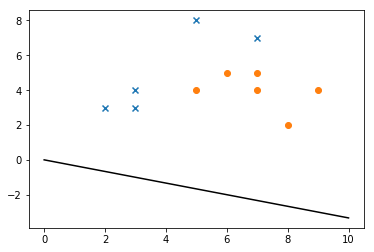

In [29]:
data2 = np.array([[2,3],
                [3,3],
                [3,4],
                [5,8],
                [7,7],
                [5,4],
                [6,5],
                [7,4],
                [7,5],
                [8,2],
                [9,4]])
labels2 = np.array([-1,-1,-1,-1,-1,1,1,1,1,1,1])
S_inv = np.array([[0.056,.029],[-.029,-.052]])
w2, intermediates2 = two_class_LDA(data2, labels2, S_inv=S_inv, plot=True)
plot_line(w2,0)


$$\boldsymbol{\mu_{-1}}  = \begin{bmatrix}
    4.00 \\ 5.00
\end{bmatrix}$$

$$ \boldsymbol{\mu_1}  = \begin{bmatrix}
   7.00 \\ 4.00
\end{bmatrix}$$

$$\boldsymbol{B}  = \begin{bmatrix}
   9.00 & -3.00\\
   -3.00 & 1.00
\end{bmatrix}$$

$$\boldsymbol{w}  = \begin{bmatrix}
    0.82 \\ -0.58
\end{bmatrix}$$

### Question 3

data1=
[[2.5000 1.0000]
 [2.0000 2.1000]]
data2=
[[4.0000 2.9000]
 [3.5000 4.0000]]
mu_1 = 
[[2.2500]
 [1.5500]]
mu_2=
[[3.7500]
 [3.4500]]
B=
[[2.2500 2.8500]
 [2.8500 3.6100]]
mu_1 - mu_2=
[[-1.5000]
 [-1.9000]]
Z_1=
[[0.2500 -0.5500]
 [-0.2500 0.5500]]
Z_2=
[[0.2500 -0.5500]
 [-0.2500 0.5500]]
S_1=
[[0.1250 -0.2750]
 [-0.2750 0.6050]]
S_2=
[[0.1250 -0.2750]
 [-0.2750 0.6050]]
S=
[[0.2500 -0.5500]
 [-0.5500 1.2100]]
eigenvals=
[0.0000 0.8424]
eigenvecs=
[[-0.9104 -0.6196]
 [-0.4138 -0.7849]]
w=
[-0.6196 -0.7849]
seperator = 
[2.4804 3.1418]


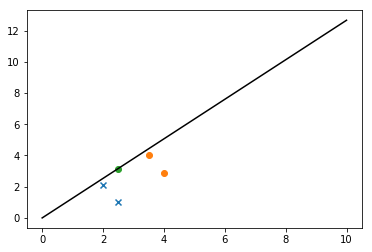

In [30]:
data3 = np.array([[4,2.9],
                  [3.5,4],
                  [2.5,1],
                  [2,2.1]])
labels3 = np.array([1,1,-1,-1])


w3, intermediates3 = two_class_LDA(data3,labels3, plot=True)
mu_1,mu_2 = intermediates3['mu_1'], intermediates3['mu_2']
plot_line(w3,0)
means = np.hstack((mu_1, mu_2)) # stack column vectors horizontally
mean_of_means = np.mean(means,axis=0, keepdims=True) # compute mean accross rows
seperator = w3*mean_of_means.dot(w3)
plt.scatter(seperator[0], seperator[1])
print(f'seperator = \n{seperator}')
plt.show()

$$\boldsymbol{B}  = \begin{bmatrix}
    2.25 & 2.85  \\
    2.85 & 3.61 \\
\end{bmatrix}$$

$$ \boldsymbol{S_{-1}}  = \begin{bmatrix}
    0.13 & -0.28  \\
    -0.28 & 0.61 \\
\end{bmatrix}$$

$$\boldsymbol{S_1}  = \begin{bmatrix}
  0.13 & -0.28  \\
   -0.28 & 0.61 \\
\end{bmatrix}$$

$$\boldsymbol{S}  = \begin{bmatrix}
    0.25 & -0.55  \\
    -0.55 & 1.21 \\
\end{bmatrix}$$

$$\boldsymbol{w}  = \begin{bmatrix}
   -0.62 \\ -0.78
\end{bmatrix}$$
The point best seperating the two classes
$$ \begin{bmatrix}
   2.3677 \\ 2.9991
\end{bmatrix}$$


### Question 4

data1=
[[2 2]
 [3 2]]
data2=
[[1 1]
 [2 1]
 [1 2]]
mu_1 = 
[[2.5000]
 [2.0000]]
mu_2=
[[1.3333]
 [1.3333]]
B=
[[1.3611 0.7778]
 [0.7778 0.4444]]
mu_1 - mu_2=
[[1.1667]
 [0.6667]]
Z_1=
[[-0.5000 0.0000]
 [0.5000 0.0000]]
Z_2=
[[-0.3333 -0.3333]
 [0.6667 -0.3333]
 [-0.3333 0.6667]]
S_1=
[[0.5000 0.0000]
 [0.0000 0.0000]]
S_2=
[[0.6667 -0.3333]
 [-0.3333 0.6667]]
S=
[[1.1667 -0.3333]
 [-0.3333 0.6667]]
eigenvals=
[0.0000 2.9167]
eigenvecs=
[[-0.7593 0.8682]
 [0.6508 0.4961]]
w=
[0.8682 0.4961]


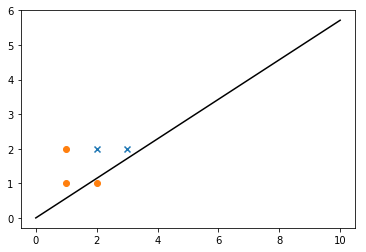

In [31]:
data4 = np.array([[1,1],
                  [2,1],
                  [1,2],
                  [2,2],
                  [3,2]])
labels4 = np.array([1,1,1,-1,-1])
w4, intermediates4 = two_class_LDA(data4, labels4, plot=True)
plot_line(w4, 0)

$$\boldsymbol{B}  = \begin{bmatrix}
    1.3611 & 0.7778 \\
    0.7778 & 0.4444
\end{bmatrix}$$

$$ \boldsymbol{S_{-1}}  = \begin{bmatrix}
    0.5000 & 0.0000\\
     0.0000 & 0.0000
\end{bmatrix}$$

$$\boldsymbol{S_1}  = \begin{bmatrix}
    0.6667 && -0.3333\\
    -0.3333 && 0.6667 \\
\end{bmatrix}$$

$$\boldsymbol{S}  = \begin{bmatrix}
  1.1667 && -0.3333\\
 -0.3333 && 0.6667
\end{bmatrix}$$

$$\boldsymbol{w}  = \begin{bmatrix}
  0.8682 \\ 0.4961
\end{bmatrix}$$
